In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns',None) 

In [2]:
# read dataset

train_path = r"C:\Users\nurda\Downloads\eğitim.csv"
test_path = r"C:\Users\nurda\Downloads\test.csv"

dfe = pd.read_csv(train_path)
dft = pd.read_csv(test_path)

print("Train Data:")
print(dfe)

print("\nTest Data:")
print(dft)


Train Data:
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...   

## Data Overview

In [3]:
#training data
dfe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#test data
dft.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
dfe.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
dft.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
dft.index

RangeIndex(start=0, stop=418, step=1)

In [8]:
dfe.index

RangeIndex(start=0, stop=891, step=1)

In [9]:
dfe.shape

(891, 12)

In [10]:
dft.shape

(418, 11)

In [11]:
dfe.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [12]:
dfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
#train data
dfe.duplicated(keep=False).sum()

0

In [14]:
#test data
dft.duplicated(keep=False).sum()

0

In [15]:
dfe.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [16]:
dft.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [17]:
dfe["Age"].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [18]:
#Get the average and sum of survived and fare variables by sex and pclass
dfe.groupby(["Sex","Pclass"]).agg({"Survived":["mean","sum"],
                                   "Fare":["mean","sum"]})

Survived            Fare           
                   mean sum        mean        sum
Sex    Pclass                                     
female 1       0.968085  91  106.125798  9975.8250
       2       0.921053  70   21.970121  1669.7292
       3       0.500000  72   16.118810  2321.1086
male   1       0.368852  45   67.226127  8201.5875
       2       0.157407  17   19.741782  2132.1125
       3       0.135447  47   12.661633  4393.5865

In [19]:
dfe.loc[(dfe["Sex"]=="female") & (dfe["Age"]>=30.0)  &
((dfe["Embarked"]=="S" ) | (dfe["Embarked"]=="Q" )),["Survived","Pclass","Sex"]]

,Survived,Pclass,Sex
3,1,1,female
11,1,1,female
15,1,2,female
18,0,3,female
25,1,3,female
...,...,...,...
856,1,1,female
862,1,1,female
865,1,2,female
871,1,1,female


In [20]:
#add new columns
dft["age1"]=pd.cut(dft["Age"],bins=3,labels=("genç","orta","yaslı"))
dft

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age1
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,orta
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,orta
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,yaslı
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,orta
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,genç
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,NaN
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,orta
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,orta
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,NaN


In [21]:
dft.groupby(["age1"],observed=True)["Embarked"].value_counts()

age1   Embarked
genç   S           107
       C            25
       Q            10
orta   S           104
       C            45
       Q            10
yaslı  S            17
       C            12
       Q             2
Name: count, dtype: int64

In [22]:


dft.rename(columns={"age1": "Age1"})

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age1
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,orta
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,orta
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,yaslı
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,orta
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,genç
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,NaN
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,orta
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,orta
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,NaN


## Missing Value 

In [23]:
dfe.isnull().values.any()

True

In [24]:
dfe.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [25]:
dfe.dropna(subset=["Age","Cabin","Embarked"]).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [26]:
dfe.dropna(subset=["Age","Cabin","Embarked"]).head().isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## Outlier Value

In [27]:
q1 = dfe["Age"].quantile(0.25)
q3 = dfe["Age"].quantile(0.75)
iqr = q3 - q1
up = q3 + 1.5 * iqr
low = q1 - 1.5 * iqr


In [28]:
dfe[(dfe["Age"] < low) | (dfe["Age"] > up)].any(axis=None)

True

In [29]:
dfe_no_outliers_age = dfe[~((dfe["Age"] < low) | (dfe["Age"] > up))]
dfe_no_outliers_age.shape

(880, 12)

<Axes: xlabel='Fare'>

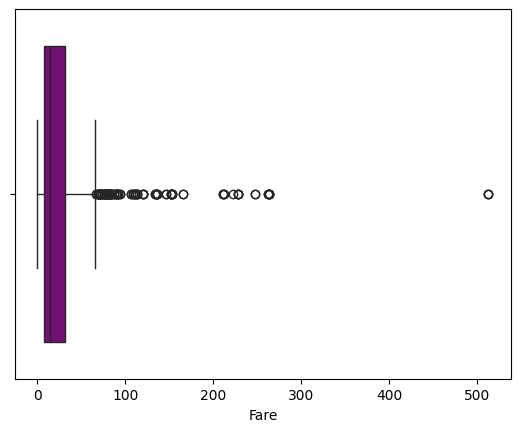

In [30]:
#Fare variable Boxplot 
sns.boxplot(x=dfe["Fare"],data=dfe,color="purple")


In [31]:
#Delete Outlier Value
Q1 = dfe["Fare"].quantile(0.25)  
Q3 = dfe["Fare"].quantile(0.75)  
IQR = Q3 - Q1
low = Q1 - 1.5 * IQR
up = Q3 + 1.5 * IQR

In [32]:
dfe[(dfe["Fare"] < low) | (dfe["Fare"] > up)].any(axis=None)

True

In [34]:
dfe_no_outliers = dfe[~((dfe["Fare"] < low) | (dfe["Fare"] > up))]
dfe_no_outliers.shape

(775, 12)

## Data Visualization

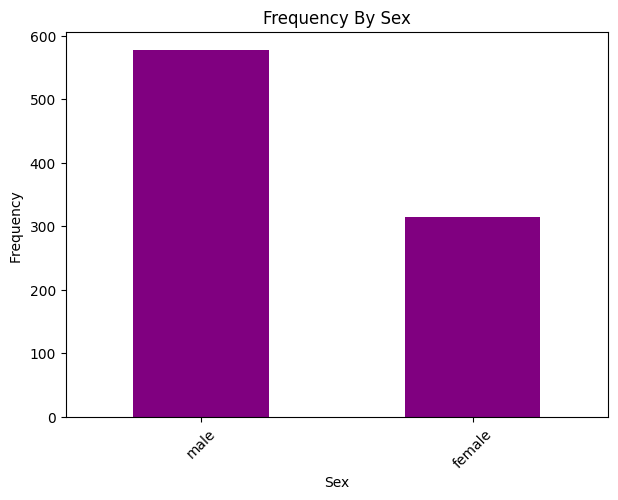

In [35]:
#Frequency By Sex -BAR

plt.figure(figsize=(7,5))
dfe["Sex"].value_counts().plot(kind="bar",color="purple")
plt.xticks(rotation=45)
plt.xlabel("Sex",fontsize=10)
plt.ylabel("Frequency ",fontsize=10)
plt.title("Frequency By Sex",fontsize=12)
plt.show()

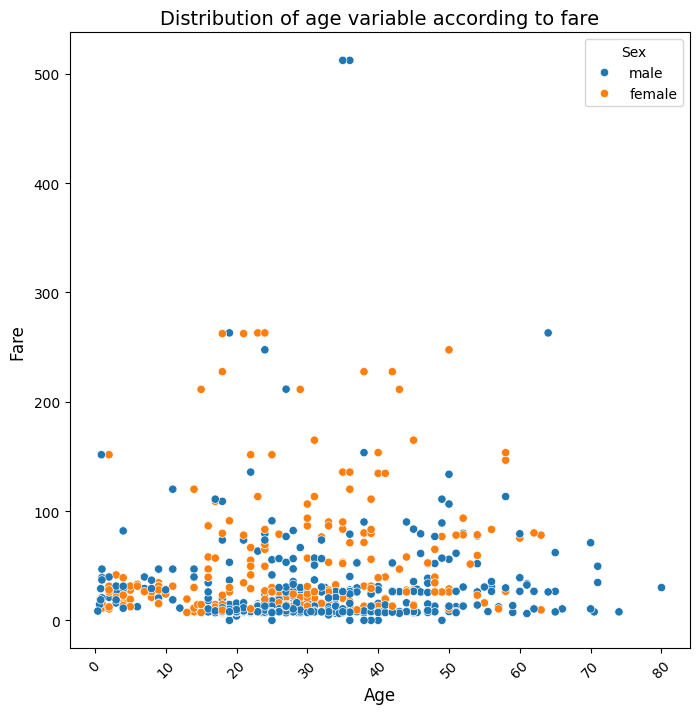

In [36]:
#Distribution of age variable according to fare

plt.figure(figsize=(8,8))
sns.scatterplot(x=dfe["Age"],y=dfe["Fare"],data=dfe,hue="Sex")
plt.xticks(rotation=45)
plt.xlabel("Age",fontsize=12)
plt.ylabel("Fare ",fontsize=12)
plt.title("Distribution of age variable according to fare",fontsize=14)
plt.show()

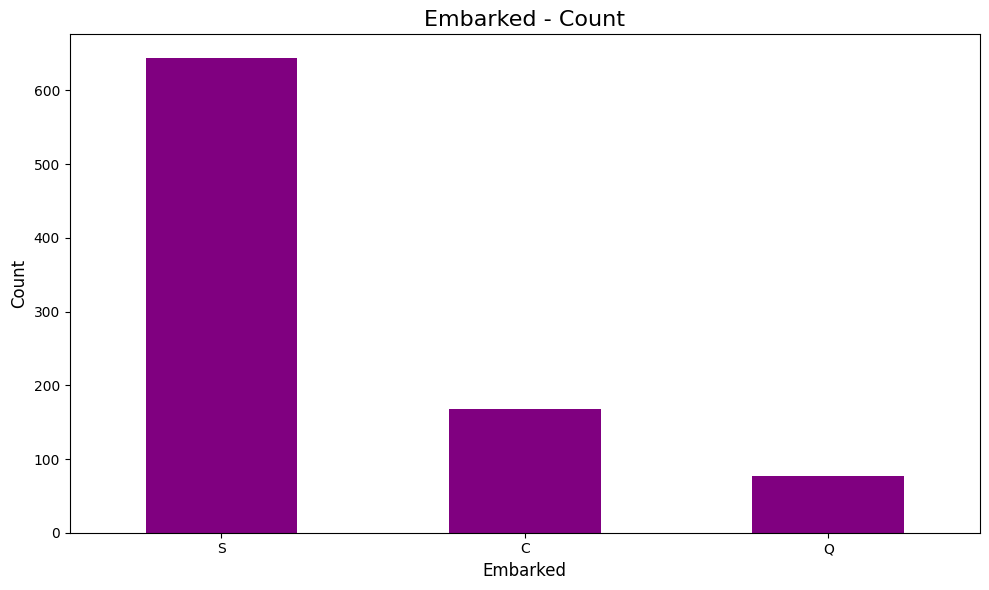

In [37]:
#embarked -count 
plt.figure(figsize=(10, 6)) 
dfe["Embarked"].value_counts().plot(kind="bar", color='purple')
plt.title('Embarked - Count', fontsize=16)
plt.xlabel('Embarked', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

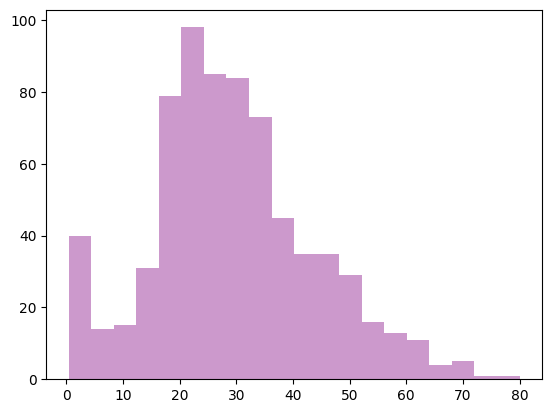

In [38]:
sns.distplot(x=dfe["Age"], kde=False,color="purple")
plt.show()

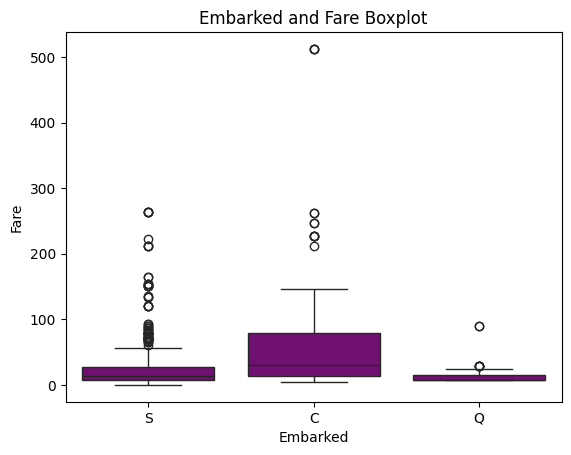

In [39]:
#Embarked and Fare 
sns.boxplot(x= dfe["Embarked"],y=dfe["Fare"],data=dfe,color="purple")
plt.title("Embarked and Fare Boxplot")
plt.show()

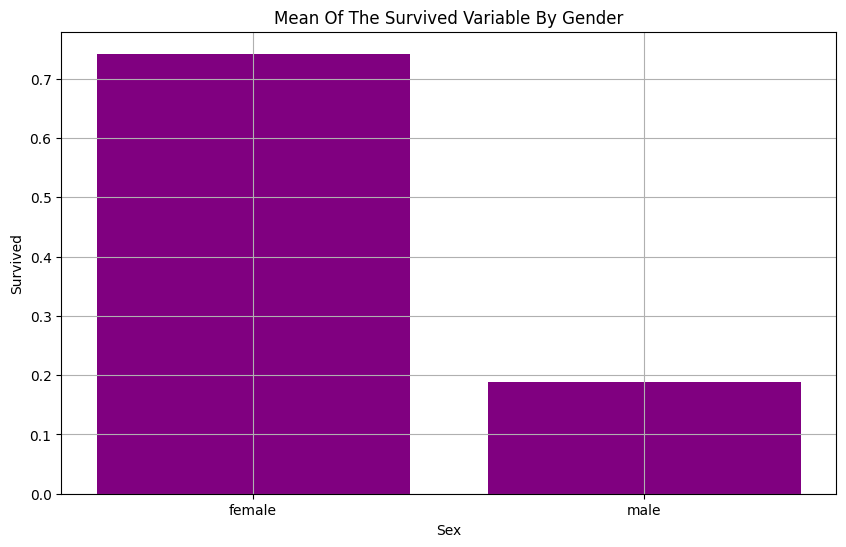

In [40]:
g=dfe.groupby("Sex")["Survived"].mean()
plt.figure(figsize=(10, 6))
plt.bar(g.index, g.values,color="purple")
plt.title("Mean Of The Survived Variable By Gender")
plt.xlabel("Sex")
plt.ylabel("Survived")
plt.grid()
plt.show()

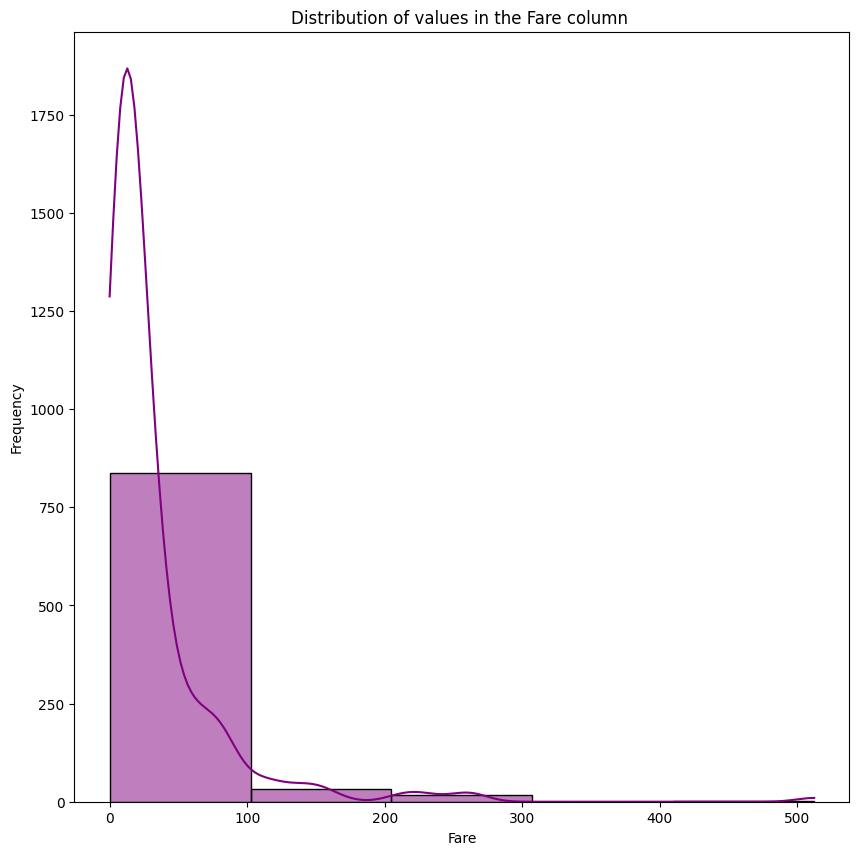

In [41]:
#Distribution of values in the Fare column
plt.figure(figsize=(10,10))
sns.histplot(data=dfe,x="Fare",kde=True,bins=5,color="purple",edgecolor="black")
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.title("Distribution of values in the Fare column ")
plt.show()